In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# Find anatomical domains

In [2]:
from wsidata import open_wsi
import lazyslide as zs

We've saved the spatialdata on the disk previously, lazyslide will try to reload it when you open the slide again

In [3]:
wsi = open_wsi("GTEX-1117F-1626.svs")

Run preprocess and feature extraction

In [ ]:
zs.pp.find_tissues(wsi)
zs.pp.tile_tissues(wsi, 256, mpp=0.5)
zs.tl.feature_extraction(wsi, "resnet50", device="mps")

In [5]:
zs.tl.spatial_domain(wsi, "resnet50")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


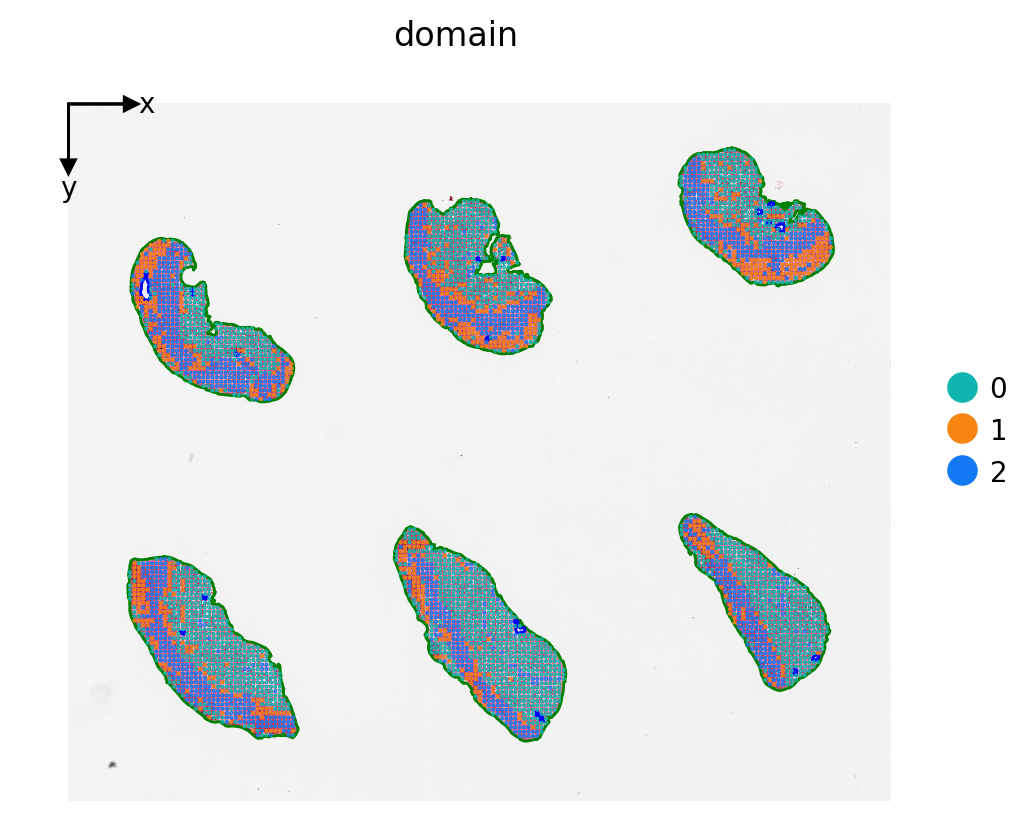

In [6]:
zs.pl.tiles(wsi, color="domain")

## UTAG

[UTAG](https://doi.org/10.1038/s41592-022-01657-2) is a method develop to discovery spatial domain with unsupervised learning

### Tile Graph Building

In [7]:
zs.pp.tile_graph(wsi)

### Create UTAG features

In [8]:
zs.tl.feature_utag(wsi, "resnet50")

In [9]:
### Run spatial domain using UTAG features

In [10]:
zs.tl.spatial_domain(wsi, "resnet50", layer="utag")

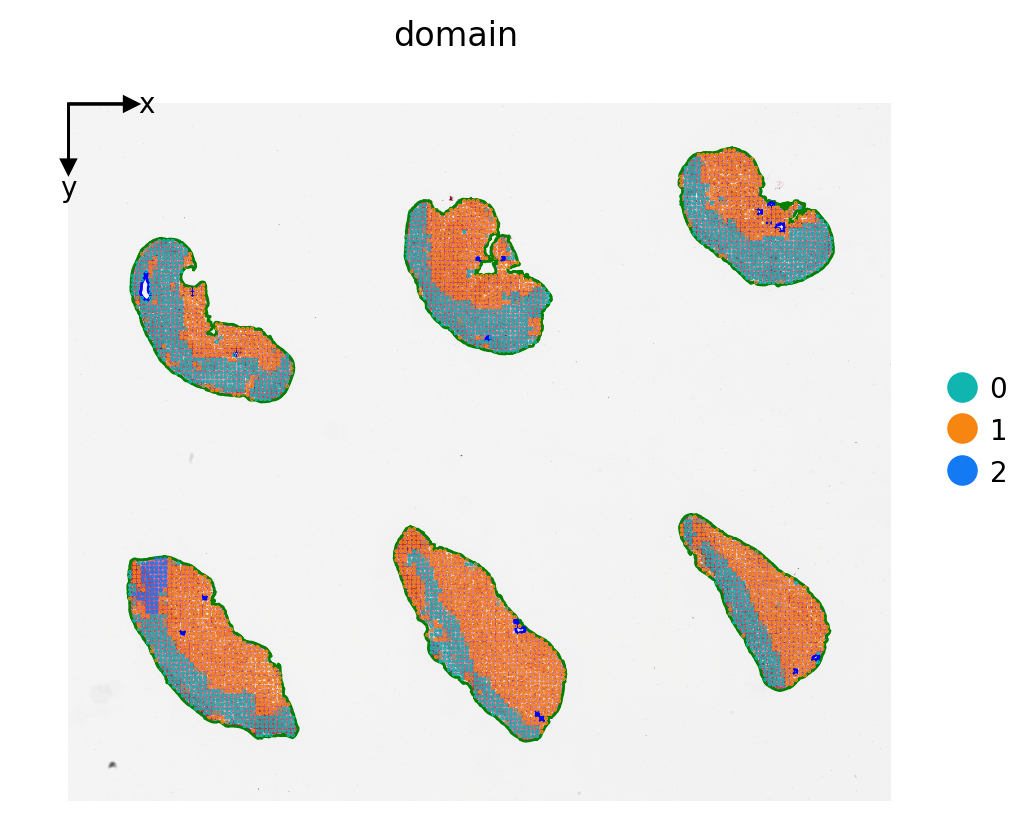

In [11]:
zs.pl.tiles(wsi, color="domain")